# Algerian Forest ML Project

Project is divided into 6 parts:
- 1: Importing Libraries and Loading Data<br>
- 2: Data Cleansing<br>
- 3: Data Visualizing<br>
- 4: Model Building<br>
    -  Part 4.1: Classification Models<br>
    -  Part 4.2: Regression Models<br> 
- 5: Model Selection<br>
- 6: Pickeling both the models<br>

# Part 1: Importing Libraries and Loading Data

In [83]:
#importing standard libraries
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #for train test split
from sklearn.preprocessing import StandardScaler #for normalizing data
#importing libraries for classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV # for parameter tuning using Grid Searchcv
from sklearn.model_selection import cross_val_score #for cross val score
from sklearn.metrics import r2_score #for r2 score
#importing libraries for classification models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle #to create pickle of model

About data:<br>

Dataset = https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)<br>
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8<br>
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire and not fire

In [2]:
#loading dataset
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')
df

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


# Part 2: Data Cleansing

In [3]:
#skipping first row of csv
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",skiprows=[0])
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire


In [4]:
df.dtypes

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [5]:
#trimming white spaces from column names
df.columns = df.columns.str.strip()

In [6]:
#checking for null values
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [7]:
#finding index of nullvalues in Classes column
np.where(df['Classes'].isnull())[0]

array([122, 167], dtype=int64)

In [8]:
df[122:123]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df[167:168]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [10]:
#trimming white spaces from Classes column values
df['Classes']=df['Classes'].str.strip()

In [11]:
#making changes to value of row 167 
df['DC'][167]='14.6'
df['ISI'][167]='9'
df['BUI'][167]='12.5'
df['FWI'][167]='10.4'
df['Classes'][167]='fire'

In [12]:
df[167:168]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6,9,12.5,10.4,fire


In [13]:
#dropping row 122 and reseting index
df.drop(df.index [ [122 ] ],inplace=True)
df.reset_index(inplace = True,drop=True)
df[122:123]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [14]:
#dropping row 122 and reseting index
df.drop(df.index [ [122 ] ],inplace=True)
df.reset_index(inplace = True,drop=True)
df[122:123]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [15]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [16]:
#making copy of dataset
df1=df
df1.index

RangeIndex(start=0, stop=244, step=1)

In [17]:
#adding region column to dataframe
df1['Region'] = ['Bejaia Region' if i<122 else 'Sidi-Bel Abbes Region' for i in range(len(df1))]
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia Region
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia Region
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia Region
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia Region
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia Region


# Part 3: Data Visualizing

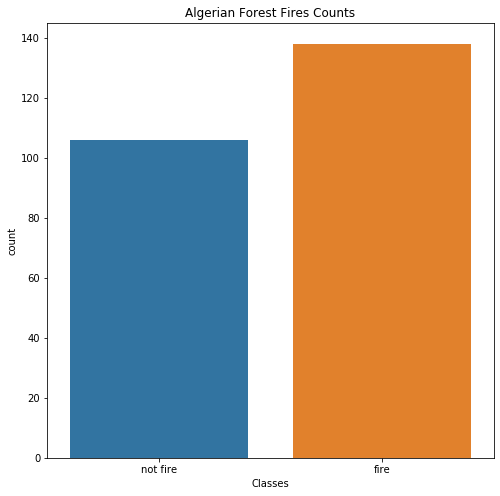

In [18]:
#Count plot
f, ax = plt.subplots(1,1, figsize = (8, 8))
sns.countplot(df1['Classes'], ax = ax, )
ax.tick_params('x')
ax.set_title('Algerian Forest Fires Counts')
plt.show()

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 8 Text yticklabel objects>)

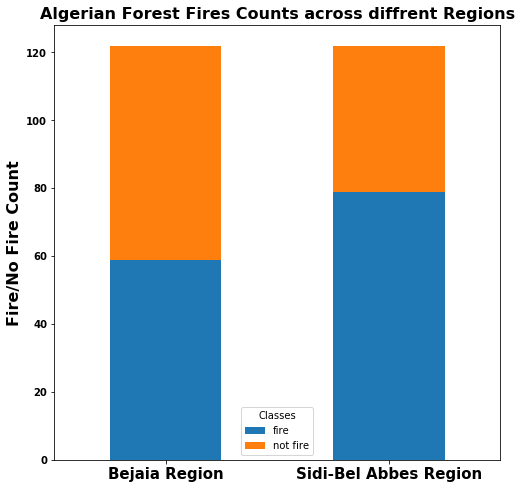

In [19]:
#crosstab bar plot of regions vs classes
fig, ax = plt.subplots(figsize=(8,8))
type_plt=pd.crosstab(df1['Region'],df1['Classes'])
type_plt.plot(kind='bar',stacked=True,ax=ax);
plt.title('Algerian Forest Fires Counts across diffrent Regions',fontsize=16,fontweight='bold')
plt.ylabel('Fire/No Fire Count',fontsize=16,fontweight='bold')
plt.xlabel('',fontsize=16,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold',rotation=0)
plt.yticks(fontsize=10,fontweight='bold')

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 <a list of 8 Text yticklabel objects>)

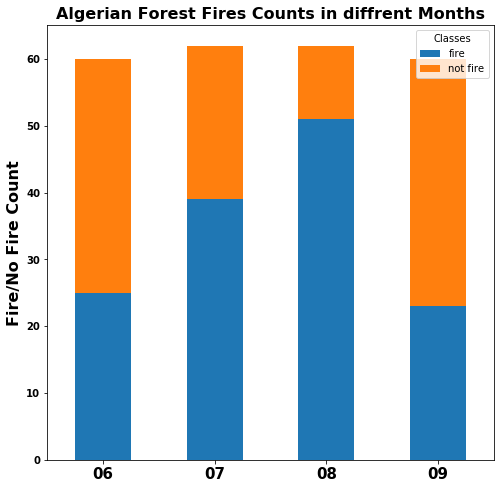

In [20]:
#crosstab bar plot of month vs classes
fig, ax = plt.subplots(figsize=(8,8))
type_plt=pd.crosstab(df1['month'],df1['Classes'])
type_plt.plot(kind='bar',stacked=True,ax=ax);
plt.title('Algerian Forest Fires Counts in diffrent Months',fontsize=16,fontweight='bold')
plt.ylabel('Fire/No Fire Count',fontsize=16,fontweight='bold')
plt.xlabel('',fontsize=16,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold',rotation=0)
plt.yticks(fontsize=10,fontweight='bold')

In [21]:
#assigning int values to classes and region column
df1['Classes']=df1['Classes'].map({"not fire":0,"fire":1})
df1['Region']=df1['Region'].map({"Bejaia Region":0,"Sidi-Bel Abbes Region":1})
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0


In [22]:
#checking for duplicates
df1[df1.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [23]:
#dropping day and year columns and changing position of region column
df1.drop(['day','year'],axis=1,inplace=True)
df1.insert(1, 'Region', df1.pop('Region'))
df1.head()

,month,Region,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,06,0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,06,0,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0
2,06,0,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,06,0,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0
4,06,0,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0


In [24]:
df1.describe()

,Region,Classes
count,244.000000,244.000000
mean,0.500000,0.565574
std,0.501028,0.496700
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.500000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [25]:
#changing datatypes of columns to int or float
df1 = df1.astype({'month': np.int64,'Temperature': np.int64, 'RH': np.int64,'Ws': np.int64,'Rain': np.float,'FFMC': np.float,'DMC': np.float,
                 'DC':np.float,'ISI':np.float,'BUI':np.float,'FWI':np.float})

In [26]:
df1.describe()

,month,Region,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,7.500000,0.500000,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180,0.565574
std,1.112961,0.501028,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366,0.496700
min,6.000000,0.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,7.000000,0.000000,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,7.500000,0.500000,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000,1.000000
75%,8.000000,1.000000,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,9.000000,1.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [27]:
df1.head(2)

,month,Region,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,6,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,6,0,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0


In [28]:
df1.dtypes

month            int64
Region           int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
dtype: object

In [29]:
df1['Classes'].value_counts()

1    138
0    106
Name: Classes, dtype: int64

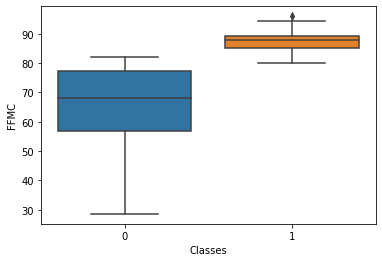

In [30]:
#plotting box plot
sns.boxplot(x="Classes",y="FFMC", data= df1)

# Part 4: Model Building
For classification models dependent features is Classes, rest all are independent features and dataframe is df1.<br>
For regression models dependent features is FFMC (Fine Fuel Moisture Code) rest all are independent features and dataframe is df2.

In [31]:
df2=df1
df2 = df2.reindex(columns = [col for col in df2.columns if col != 'FFMC'] + ['FFMC'])
df2.head()

,month,Region,Temperature,RH,Ws,Rain,DMC,DC,ISI,BUI,FWI,Classes,FFMC
0,6,0,29,57,18,0.0,3.4,7.6,1.3,3.4,0.5,0,65.7
1,6,0,29,61,13,1.3,4.1,7.6,1.0,3.9,0.4,0,64.4
2,6,0,26,82,22,13.1,2.5,7.1,0.3,2.7,0.1,0,47.1
3,6,0,25,89,13,2.5,1.3,6.9,0.0,1.7,0.0,0,28.6
4,6,0,27,77,16,0.0,3.0,14.2,1.2,3.9,0.5,0,64.8


In [32]:
#Features into independent and dependent features for classification
X=df1.iloc[:,:-1]
y=df1.iloc[:,-1]
#Features into independent and dependent features for regression
X2=df2.iloc[:,:-1]
y2=df2.iloc[:,-1]

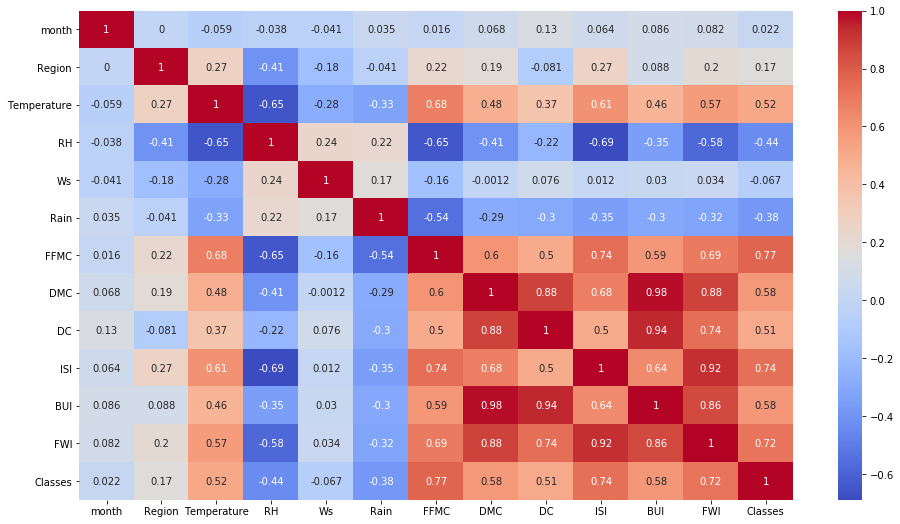

In [34]:
#plotting heatmap to get correraltion for classfication
plt.figure(figsize=(16,9))
sns.heatmap(df1.corr(), annot = True,cmap="coolwarm")

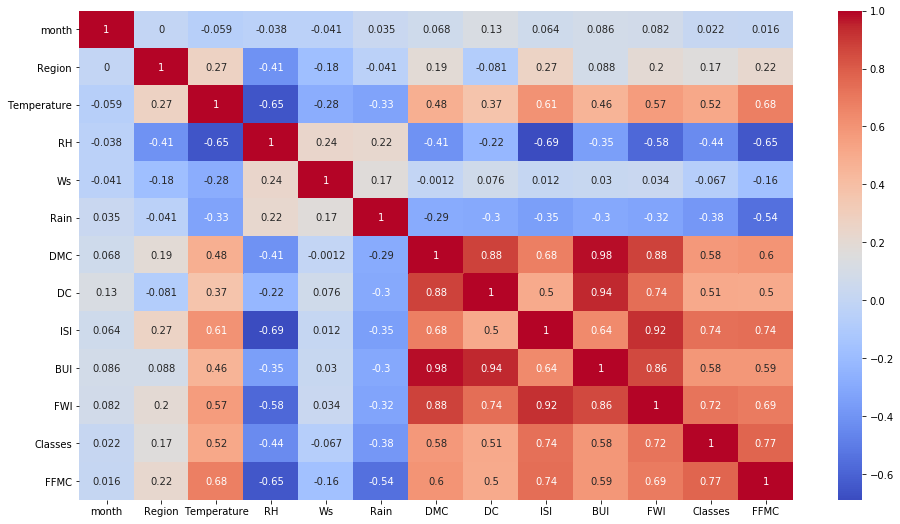

In [35]:
#plotting heatmap to get correraltion for classfication
plt.figure(figsize=(16,9))
sns.heatmap(df2.corr(), annot = True,cmap="coolwarm")

In [36]:
#train and test split data for classification
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)
print ('Train set for classification models:', X_train.shape,  y_train.shape)
print ('Test setclassification models:', X_test.shape,  y_test.shape)
#train and test split data for regression
X2_train, X2_test, y2_train, y2_test = train_test_split(
     X2, y2, test_size=0.33, random_state=42)
print ('Train set for classification models:', X2_train.shape,  y2_train.shape)
print ('Test setclassification models:', X2_test.shape,  y2_test.shape)

Train set for classification models: (163, 12) (163,)
Test setclassification models: (81, 12) (81,)
Train set for classification models: (163, 12) (163,)
Test setclassification models: (81, 12) (81,)


In [37]:
#normalizing data
X= StandardScaler().fit(X).transform(X)
X2= StandardScaler().fit(X2).transform(X2)

In [38]:
#setting columnwidth to 800
pd.set_option('max_colwidth', 800)

# Part 4.1: Classification Models

In [56]:
# creating nested dictionary for Gridsearch Cv. Dictionary has model name and 3 parameters
model_params = {
    'Logistic_Regression' : {
        'model': LogisticRegression(),
        'params': {
            'penalty': ['l1','l2','elasticnet'],
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],            
            'multi_class': ['auto', 'ovr', 'multinomial']
        }
    },
    'SVC': {
        'model': SVC(),
        'params' : {
            'C': [1,5,10,30,45],
            'gamma': ['scale','auto'],
            'kernel': ['rbf','linear']
        }  
    },
    'Random_Forest_Classifier': {
        'model': RandomForestClassifier(),
        'params' : {
            'criterion': ['gini','entropy','log_loss'],
            'max_depth' : [1,2,3,4,5,6,7,8,9,10],
            'random_state' :[0,1,2,3,4,5]
        }
    },    
    'Naive_Bayes_Gaussian': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': [1e-9,1e-6,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]
        }
    },
    'Decision_Tree_Classifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy','log_loss'],
            'max_depth' : [1,2,3,4,5],
            'random_state' :[0,1,2,3,4,5,6,7,8,9,10]
            
        }
    }     
}

In [57]:
#creating dataframe with all model names ,best parameters, mse value
scores = []#list which will be converted to dataframe

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], scoring='neg_mean_squared_error',cv=5)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': -clf.best_score_,
        'best_params': clf.best_params_
    })
    
dfc = pd.DataFrame(scores,columns=['model','best_score','best_params'])#dataframe of different regression models
dfc.rename(columns = {'best_score':'best_mse'}, inplace = True)


C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-pac

C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for

C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Ke

C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Ke

C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Ke

C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Ke

C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Ke

C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Ke

C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Ke

C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Ke

C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Ke

C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Ke

C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'log_loss'

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Ke

In [58]:
dfc

,model,best_mse,best_params
0,Logistic_Regression,0.032653,"{'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}"
1,SVC,0.053231,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}"
2,Random_Forest_Classifier,0.016327,"{'criterion': 'gini', 'max_depth': 3, 'random_state': 0}"
3,Naive_Bayes_Gaussian,0.061565,{'var_smoothing': 0.01}
4,Decision_Tree_Classifier,0.016327,"{'criterion': 'gini', 'max_depth': 3, 'random_state': 6}"


In [59]:
#editing dataframe removing unwanted characters splitting best_params col into 3 col then recombing to get parameters 
#in required format and then dropping unecessary columns
dfc[['parm1','parm2','parm3']]=dfc.best_params.apply(lambda x: pd.Series(str(x).split(","))) 
dfc['parm1']=dfc['parm1'].str.replace("{", "").str.replace(":", "=").str.replace("'", "",2).str.replace("}", "")
dfc['parm2']=dfc['parm2'].str.replace(":", "=").str.replace("'", "",2)
dfc['parm3']=dfc['parm3'].str.replace(":", "=").str.replace("}", "").str.replace("'", "",2)
dfc['final_best_parm'] = dfc['parm1'] +","+ dfc['parm2']+","+ dfc['parm3']
dfc['final_best_parm'][3]=dfc['parm1'][3]
dfc.drop(['parm1','parm2','parm3','best_params'],axis=1,inplace=True)
dfc

C:\Users\Win 10\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,model,best_mse,final_best_parm
0,Logistic_Regression,0.032653,"multi_class= 'multinomial', penalty= 'l1', solver= 'saga'"
1,SVC,0.053231,"C= 10, gamma= 'scale', kernel= 'linear'"
2,Random_Forest_Classifier,0.016327,"criterion= 'gini', max_depth= 3, random_state= 0"
3,Naive_Bayes_Gaussian,0.061565,var_smoothing= 0.01
4,Decision_Tree_Classifier,0.016327,"criterion= 'gini', max_depth= 3, random_state= 6"


In [60]:
dfc['final_best_parm']

0    multi_class= 'multinomial', penalty= 'l1', solver= 'saga'
1                      C= 10, gamma= 'scale', kernel= 'linear'
2             criterion= 'gini', max_depth= 3, random_state= 0
3                                          var_smoothing= 0.01
4             criterion= 'gini', max_depth= 3, random_state= 6
Name: final_best_parm, dtype: object

In [61]:
rr=[]#list to store r2 score this list will be added to dfc dataframe

### Logistic Regression

In [62]:
# Logistic Regression model creation
model = LogisticRegression(multi_class= 'multinomial', penalty= 'l1', solver= 'saga').fit(X_train,y_train)
yhat =model.predict(X_test)#making predictions on X_test
r2=r2_score(y_test, yhat)#calculating r2 score
rr.append(r2) #appending to the rr list

C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### SVC

In [63]:
#  SVC model creation
model = SVC(C= 10, gamma= 'scale', kernel= 'linear').fit(X_train, y_train)
yhat =model.predict(X_test)#making predictions on X_test
r2=r2_score(y_test, yhat)#calculating r2 score
rr.append(r2) #appending to the rr list

### Random Forest Classifier

In [64]:
#Random Forest Classifier model creation
model = RandomForestClassifier(criterion= 'gini', max_depth= 3, random_state= 0).fit(X_train, y_train)
yhat =model.predict(X_test)#making predictions on X_test
r2=r2_score(y_test, yhat)#calculating r2 score
rr.append(r2) #appending to the rr list

### Naive Bayes

In [65]:
#Gaussian Naive Bayes Classifier model creation
model = GaussianNB(var_smoothing= 0.01).fit(X_train, y_train)
yhat =model.predict(X_test)#making predictions on X_test
r2=r2_score(y_test, yhat)#calculating r2 score
rr.append(r2) #appending to the rr list

### Decision Tree Classifier

In [66]:
#Decision Tree Classifier model creation
model=DecisionTreeClassifier(criterion= 'gini', max_depth= 3, random_state= 0).fit(X_train,y_train)
yhat =model.predict(X_test)#making predictions on X_test
r2=r2_score(y_test, yhat)#calculating r2 score
rr.append(r2) #appending to the rr list

In [67]:
dfc['r2']=rr#adding list dfc dataframe
dfc

,model,best_mse,final_best_parm,r2
0,Logistic_Regression,0.032653,"multi_class= 'multinomial', penalty= 'l1', solver= 'saga'",0.617925
1,SVC,0.053231,"C= 10, gamma= 'scale', kernel= 'linear'",0.945418
2,Random_Forest_Classifier,0.016327,"criterion= 'gini', max_depth= 3, random_state= 0",0.890836
3,Naive_Bayes_Gaussian,0.061565,var_smoothing= 0.01,0.345013
4,Decision_Tree_Classifier,0.016327,"criterion= 'gini', max_depth= 3, random_state= 6",1.000000


# Part 4.2: Regression Models

In [68]:
# creating nested dictionary for Gridsearch Cv. Dictionary has model name and 3 parameters
model_params = {
    'Linear_Regression' : {
        'model': LinearRegression(),
        'params': {
            'normalize' : [True,False],
           'n_jobs' : [1,5,10,25,50,100],
            'fit_intercept': [True,False]
            
        }
    },
    'Ridge_Regression' : {
        'model': Ridge(),
        'params': {
            'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],
            'normalize' : [True,False],
            'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
            
        }
    },
    'Lasso_Regression' : {
        'model': Lasso(),
        'params': {
            'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],
            'normalize' : [True,False],
            'selection' : ['cyclic', 'random']            
        }
    },
    'SVR': {
        'model': SVR(),
        'params' : {            
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma': ['scale','auto'],
            'C': [1,5,10,30,45]
        }  
    },
    'Random_Forest_Regressor': {
        'model': RandomForestRegressor(),
        'params' : {
            'n_estimators': [1,5,10],
            'max_depth' : [1,2,3,4,5,6,7,8,9,10],
            'random_state' :[0,1,2,3,4,5]
            
            
        }
    },    
   
    'Decision_Tree_Regressor': {
        'model': DecisionTreeRegressor(),
        'params': {
            'splitter' : ['best', 'random'],
            'max_depth' : [1,2,3,4,5,6,7,8,9,10],
            'random_state' : [0,1,2,3,4,5]
            
        }
    }     
}

In [69]:
#creating dataframe with all model names ,best parameters, mse value
scores = []#list which will be converted to dataframe

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], scoring='neg_mean_squared_error',cv=5)
    clf.fit(X2, y2)
    
    scores.append({
        'model': model_name,
        'best_score': -clf.best_score_,
        'best_params': clf.best_params_,
        
    })
    
dfr = pd.DataFrame(scores,columns=['model','best_score','best_params'])#dataframe of different regression models
dfr.rename(columns = {'best_score':'best_mse'}, inplace = True)

C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'saga'. Got lbfgs.

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'saga'. Got lbfgs.

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'saga'. Got lbfgs.

  FitFailedW

C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'saga'. Got lbfgs.

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'saga'. Got lbfgs.

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'saga'. Got lbfgs.

  FitFailedW

C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'saga'. Got lbfgs.

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'saga'. Got lbfgs.

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'saga'. Got lbfgs.

  FitFailedW

C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'saga'. Got lbfgs.

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'saga'. Got lbfgs.

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'saga'. Got lbfgs.

  FitFailedW

C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'saga'. Got lbfgs.

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'saga'. Got lbfgs.

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'saga'. Got lbfgs.

  FitFailedW

C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'saga'. Got lbfgs.

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'saga'. Got lbfgs.

  FitFailedWarning)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'saga'. Got lbfgs.

  FitFailedW

C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2840.976585093074, tolerance: 3.593338461538462
  positive)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3588.0427036141523, tolerance: 4.1390507179487175
  positive)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3305.6559124182386, tolerance: 3.5644360717948715
  positive)
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

In [70]:
dfr

,model,best_mse,best_params
0,Linear_Regression,89.163739,"{'fit_intercept': True, 'n_jobs': 1, 'normalize': True}"
1,Ridge_Regression,47.701945,"{'alpha': 10, 'normalize': False, 'solver': 'sag'}"
2,Lasso_Regression,49.181911,"{'alpha': 1, 'normalize': False, 'selection': 'random'}"
3,SVR,22.678287,"{'C': 45, 'gamma': 'auto', 'kernel': 'rbf'}"
4,Random_Forest_Regressor,4.180256,"{'max_depth': 8, 'n_estimators': 5, 'random_state': 2}"
5,Decision_Tree_Regressor,4.826897,"{'max_depth': 7, 'random_state': 0, 'splitter': 'random'}"


In [71]:
#editing dataframe removing unwanted characters splitting best_params col into 3 col then recombing to get parameters 
#in required format and then dropping unecessary columns
dfr[['parm1','parm2','parm3']]=dfr.best_params.apply(lambda x: pd.Series(str(x).split(","))) 
dfr['parm1']=dfr['parm1'].str.replace("{", "").str.replace(":", "=").str.replace("'", "",2)
dfr['parm2']=dfr['parm2'].str.replace(":", "=").str.replace("'", "",2)
dfr['parm3']=dfr['parm3'].str.replace(":", "=").str.replace("}", "").str.replace("'", "",2)
dfr['final_best_parm'] = dfr['parm1'] +","+ dfr['parm2']+","+ dfr['parm3']
dfr.drop(['parm1','parm2','parm3','best_params'],axis=1,inplace=True)
dfr

,model,best_mse,final_best_parm
0,Linear_Regression,89.163739,"fit_intercept= True, n_jobs= 1, normalize= True"
1,Ridge_Regression,47.701945,"alpha= 10, normalize= False, solver= 'sag'"
2,Lasso_Regression,49.181911,"alpha= 1, normalize= False, selection= 'random'"
3,SVR,22.678287,"C= 45, gamma= 'auto', kernel= 'rbf'"
4,Random_Forest_Regressor,4.180256,"max_depth= 8, n_estimators= 5, random_state= 2"
5,Decision_Tree_Regressor,4.826897,"max_depth= 7, random_state= 0, splitter= 'random'"


In [73]:
dfr['final_best_parm']

0      fit_intercept= True, n_jobs= 1, normalize= True
1           alpha= 10, normalize= False, solver= 'sag'
2      alpha= 1, normalize= False, selection= 'random'
3                  C= 45, gamma= 'auto', kernel= 'rbf'
4       max_depth= 8, n_estimators= 5, random_state= 2
5    max_depth= 7, random_state= 0, splitter= 'random'
Name: final_best_parm, dtype: object

In [74]:
rr=[]#list to store r2 score this list will be added to dfr dataframe

### Linear Regression

In [75]:
# Linear Regression model creation
model=LinearRegression(fit_intercept= True, n_jobs= 1, normalize= True).fit(X2_train, y2_train)
yhat =model.predict(X2_test)#making predictions on X_test
r2=r2_score(y2_test, yhat)#calculating r2 score
rr.append(r2) #appending to the rr list

### Ridge Regression

In [76]:
# Ridge Regression model creation
model=Ridge(alpha= 10, normalize= False, solver= 'sag').fit(X2_train, y2_train)
yhat =model.predict(X2_test)#making predictions on X_test
r2=r2_score(y2_test, yhat)#calculating r2 score
rr.append(r2) #appending to the rr list

### Lasso Regression

In [77]:
# Lasso Regression model creation
model=Lasso(alpha= 1, normalize= False, selection= 'random').fit(X2_train, y2_train)
yhat =model.predict(X2_test)#making predictions on X_test
r2=r2_score(y2_test, yhat)#calculating r2 score
rr.append(r2) #appending to the rr list

### SVR

In [78]:
# SVR model creation
model=SVR(C= 45, gamma= 'auto', kernel= 'rbf').fit(X2_train, y2_train)
yhat =model.predict(X2_test)#making predictions on X_test
r2=r2_score(y2_test, yhat)#calculating r2 score
rr.append(r2) #appending to the rr list

### Random Forest Regressor

In [79]:
# Random Forest Regressor model creation
model=RandomForestRegressor(max_depth= 8, n_estimators= 5, random_state= 2).fit(X2_train, y2_train)
yhat =model.predict(X2_test)#making predictions on X_test
r2=r2_score(y2_test, yhat)#calculating r2 score
rr.append(r2) #appending to the rr list

### Decision Tree Regressor

In [80]:
# Decision Tree Regressor model creation
model=DecisionTreeRegressor(max_depth= 7, random_state= 0, splitter= 'random').fit(X2_train, y2_train)
yhat =model.predict(X2_test)#making predictions on X_test
r2=r2_score(y2_test, yhat)#calculating r2 score
rr.append(r2) #appending to the rr list

In [81]:
dfr['r2']=rr#adding list dfr dataframe
dfr

,model,best_mse,final_best_parm,r2
0,Linear_Regression,89.163739,"fit_intercept= True, n_jobs= 1, normalize= True",0.781248
1,Ridge_Regression,47.701945,"alpha= 10, normalize= False, solver= 'sag'",0.722208
2,Lasso_Regression,49.181911,"alpha= 1, normalize= False, selection= 'random'",0.668941
3,SVR,22.678287,"C= 45, gamma= 'auto', kernel= 'rbf'",0.291212
4,Random_Forest_Regressor,4.180256,"max_depth= 8, n_estimators= 5, random_state= 2",0.975458
5,Decision_Tree_Regressor,4.826897,"max_depth= 7, random_state= 0, splitter= 'random'",0.960419


In [82]:
dfc

,model,best_mse,final_best_parm,r2
0,Logistic_Regression,0.032653,"multi_class= 'multinomial', penalty= 'l1', solver= 'saga'",0.617925
1,SVC,0.053231,"C= 10, gamma= 'scale', kernel= 'linear'",0.945418
2,Random_Forest_Classifier,0.016327,"criterion= 'gini', max_depth= 3, random_state= 0",0.890836
3,Naive_Bayes_Gaussian,0.061565,var_smoothing= 0.01,0.345013
4,Decision_Tree_Classifier,0.016327,"criterion= 'gini', max_depth= 3, random_state= 6",1.000000


# Part 5: Model Selection
#### Based on lowest mean square errors and highest r2 values from above dataframes we would use:
##### RandomForestRegressor  ( MSE= 4.180256 and r2= 0.975458) #####
for predicting FFMC with parameters as max_depth= 8, n_estimators= 5, random_state= 2<br>
##### DecisionTreeClassifier ( MSE= 0.016327	 and r2= 1) #####	
for classfiying Classes as 0(not fire) or as 1(fire) with parameters as criterion= 'gini', max_depth= 3, random_state= 6

In [84]:
rmodel=RandomForestRegressor(max_depth= 8, n_estimators= 5, random_state= 2).fit(X2_train, y2_train)

In [85]:
cmodel=DecisionTreeClassifier (criterion= 'gini', max_depth= 3, random_state= 6).fit(X_train, y_train)

# Part 6: Pickeling both the models

In [86]:
pickle.dump(rmodel, open('rmodel.pkl', 'wb'))
pickle.dump(cmodel,open('cmodel.pkl','wb'))

In [87]:
X

array([[-1.35052592, -1.        , -0.87473544, ..., -0.83447856,
        -0.93655635, -0.88345707],
       [-1.35052592, -1.        , -0.87473544, ..., -0.90683562,
        -0.9012768 , -0.89694665],
       [-1.35052592, -1.        , -1.70200461, ..., -1.07566876,
        -0.98594772, -0.9374154 ],
       ...,
       [ 1.35052592,  1.        , -1.42624822, ..., -1.05154974,
        -0.93655635, -0.92392582],
       [ 1.35052592,  1.        , -2.25351739, ..., -0.73800248,
        -0.81660589, -0.85647791],
       [ 1.35052592,  1.        , -2.25351739, ..., -0.85859758,
        -0.83777362, -0.88345707]])

In [89]:
pickled_rmodel = pickle.load(open('rmodel.pkl', 'rb'))
pickled_rmodel.predict(X2_test)#predicted values of model

array([86.6175    , 87.1       , 87.52      , 82.12      , 90.97142857,
       71.56666667, 91.67142857, 47.52      , 72.04      , 57.66      ,
       62.96      , 79.32      , 80.29380952, 73.25      , 89.37838095,
       85.93      , 93.06      , 37.08      , 86.5295    , 85.54933333,
       80.57      , 61.46      , 87.4       , 62.24666667, 93.34      ,
       48.62      , 84.812     , 86.5575    , 82.32      , 90.404     ,
       86.792     , 62.96666667, 86.78      , 86.76      , 80.36380952,
       73.56      , 78.36      , 83.92      , 64.52      , 50.96      ,
       83.2       , 82.52      , 78.7       , 36.14      , 92.48      ,
       86.5295    , 85.532     , 66.44666667, 92.44      , 87.56      ,
       92.56      , 82.37      , 85.532     , 89.11321429, 89.37838095,
       84.88      , 94.14      , 71.6       , 64.58      , 92.56      ,
       88.59321429, 71.52      , 89.21380952, 84.65933333, 79.44      ,
       41.36      , 87.42      , 84.34      , 92.04      , 91.8 

In [94]:
print(list(y2_test))#actual values of model

[86.7, 88.2, 87.6, 80.2, 92.0, 73.8, 89.3, 48.7, 73.2, 59.9, 72.6, 79.5, 82.0, 78.3, 89.1, 86.0, 94.3, 36.1, 86.4, 86.2, 80.1, 59.8, 89.4, 59.9, 93.8, 47.4, 84.5, 87.0, 80.8, 90.5, 87.8, 66.1, 86.8, 87.2, 79.9, 77.5, 75.8, 83.9, 65.5, 45.9, 82.4, 83.7, 77.8, 37.3, 91.9, 86.5, 84.6, 66.6, 88.3, 88.7, 92.2, 80.8, 84.5, 88.9, 89.2, 85.8, 93.9, 79.7, 63.7, 90.6, 88.0, 68.3, 88.9, 84.2, 77.1, 40.9, 87.4, 83.8, 92.1, 88.9, 84.7, 82.2, 89.4, 88.7, 92.2, 84.6, 88.1, 82.6, 90.3, 79.4, 89.1]


In [90]:
pickled_cmodel = pickle.load(open('cmodel.pkl', 'rb'))
pickled_cmodel.predict(X_test)#predicted values of model

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [95]:
print(list(y_test))#actual values of model

[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
